## 广东2022年7月清洁与污染个例
## `GZ_2207 Clean & Pollute`

---
*@author: Evan*\
*@date: 2022-08-27*

In [14]:
import netCDF4 as nc
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt


In [15]:
# silence the warning note
import warnings
warnings.filterwarnings("ignore")

In [16]:
# 允许显示中文
plt.rcParams['font.sans-serif'] = ['Microsoft YaHei']
plt.rcParams['axes.unicode_minus'] = False

## 读取数据

In [17]:
GridFile=nc.Dataset('F:/Data/caseGZ_2207/GRIDCRO2D_2022200.nc')
chemFile=nc.Dataset('F:/Data/caseGZ_2207/COMBINE_ACONC_CN3GD_152X110_202207_mech.nc')
uvFile=nc.Dataset('F:/Data/caseGZ_2207/COMBINE_ACONC_CN3GD_152X110_202207_uv_vertical.nc')

In [18]:
lat=np.squeeze(GridFile.variables['LAT'][:])
lon=np.squeeze(GridFile.variables['LON'][:])
NO2_L1=np.squeeze(chemFile.variables['NO2'][120:,0,:,:])*47/22.4
NO2_L2=np.squeeze(chemFile.variables['NO2'][120:,18,:,:])*47/22.4
uwind_L1=np.squeeze(uvFile.variables['UWind'][120:456,0,:110,:152])
vwind_L1=np.squeeze(uvFile.variables['VWind'][120:456,0,:110,:152])
uwind_L2=np.squeeze(uvFile.variables['UWind'][120:456,18,:110,:152])
vwind_L2=np.squeeze(uvFile.variables['VWind'][120:456,18,:110,:152])

print('lat & lon = ',lat.shape)
print('chem      = ',NO2_L1.shape)
print('wind      = ',uwind_L1.shape)

lat & lon =  (110, 152)
chem      =  (336, 110, 152)
wind      =  (336, 110, 152)


In [19]:
# read obs
sitelist=pd.read_excel('F:/Data/caseGZ_2207/obsdata/sitelist.xlsx')
# sites=list(sitelist['监测点编码'])
site_lon=sitelist['经度']
site_lat=sitelist['纬度']
obsdata=pd.read_excel('F:/Data/caseGZ_2207/obsdata/NO2_obs.xlsx')
obsdata

,date,hour,1345A,1346A,1347A,1348A,1349A,1350A,1351A,1352A,...,3451A,3452A,3453A,3454A,3455A,3622A,3623A,3626A,3627A,3628A
0,20220715,0,27.0,24.0,NaN,33.0,42.0,16.0,27.0,23.0,...,NaN,NaN,3.0,6.0,NaN,21.0,44.0,NaN,21.0,7.0
1,20220715,1,21.0,25.0,NaN,22.0,40.0,21.0,20.0,20.0,...,NaN,NaN,NaN,NaN,NaN,17.0,NaN,NaN,NaN,7.0
2,20220715,2,23.0,24.0,NaN,24.0,40.0,15.0,21.0,22.0,...,4.0,28.0,2.0,6.0,16.0,13.0,26.0,20.0,19.0,7.0
3,20220715,3,23.0,19.0,NaN,22.0,37.0,13.0,25.0,16.0,...,4.0,14.0,3.0,8.0,19.0,11.0,27.0,16.0,17.0,9.0
4,20220715,4,21.0,15.0,NaN,22.0,35.0,12.0,19.0,13.0,...,4.0,9.0,4.0,8.0,19.0,12.0,28.0,9.0,13.0,10.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
331,20220728,19,25.0,25.0,NaN,26.0,36.0,19.0,13.0,17.0,...,4.0,8.0,5.0,9.0,NaN,10.0,25.0,29.0,27.0,16.0
332,20220728,20,32.0,29.0,NaN,27.0,41.0,21.0,15.0,21.0,...,4.0,8.0,4.0,10.0,6.0,11.0,31.0,30.0,24.0,19.0
333,20220728,21,35.0,30.0,NaN,29.0,33.0,18.0,16.0,28.0,...,4.0,8.0,4.0,11.0,8.0,15.0,27.0,20.0,21.0,15.0
334,20220728,22,34.0,26.0,NaN,28.0,41.0,24.0,19.0,21.0,...,4.0,8.0,4.0,13.0,9.0,17.0,21.0,22.0,25.0,12.0


In [20]:
def t2step(date: 'int',hour: 'int',start_date: 'int',end_date: 'int'):
    """
    convert time point wanted to time step in model data
    """
    delt=date-start_date-1
    tstep=delt*24+16+hour
    return(tstep)

## 绘图

In [21]:
import cartopy.crs as ccrs
import cartopy.feature as cfeat
from cartopy.mpl.ticker import LongitudeFormatter, LatitudeFormatter
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
from cartopy.io.shapereader import Reader
import datetime

In [22]:
shp_CN=Reader('D:/files/Master/02学术/Boundary/全国省市县九段线/省级、地市级、县市级行政区划/bou1_4l.shp')
shp_SCS=Reader('D:/files/Master/02学术/Boundary/全国省市县九段线/南海诸岛/bou2_4l.shp')
shp_GD=Reader('D:/files/Master/02学术/Boundary/地形边界/Gdbound/gdboudiv_arc.shp')
shp_HK=Reader('D:/files/Master/02学术/Boundary/行政边界/HK/HK.shp')
shp_MC=Reader('D:/files/Master/02学术/Boundary/行政边界/MC/MC.shp')
shp_GZ=Reader('D:/files/Master/02学术/Boundary/全国省市县九段线/广州市/广州市.shp')

### 1.单幅图

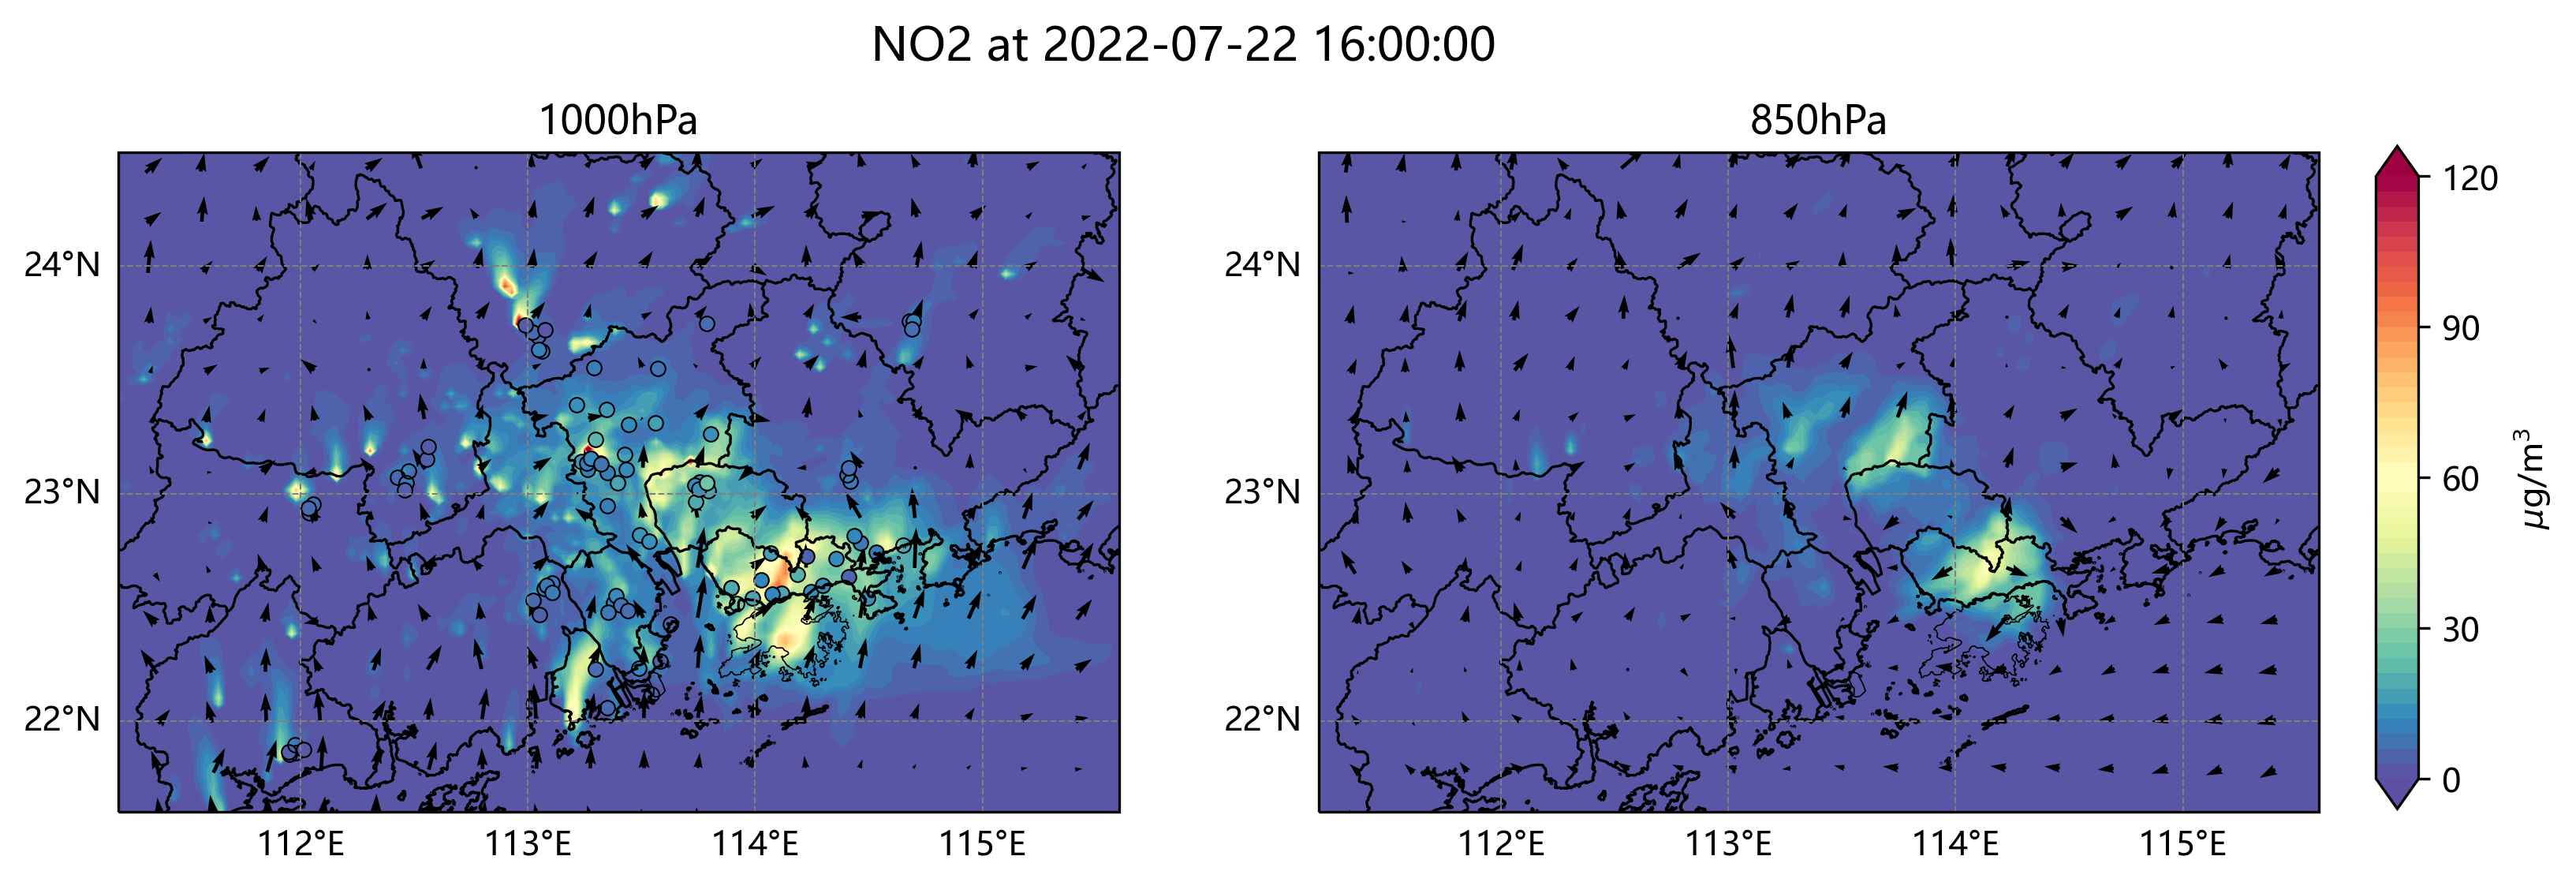

In [23]:
date=22
hour=16
tstep=t2step(date,hour,15,28)

cmax=121
cmaplevel=np.arange(0,cmax,3)
# proj=ccrs.LambertConformal(central_longitude=115,standard_parallels=(15,40))
proj=ccrs.PlateCarree()
proj_shp=ccrs.PlateCarree()
fig = plt.figure(figsize=(12,4),dpi=300)
ax = fig.subplots(1,2,subplot_kw={'projection':proj})

# SHP Lines
for i in range(2):
    # ax[i].add_feature(cfeat.ShapelyFeature(shp_CN.geometries(),proj_shp,edgecolor='k',facecolor='None'), linewidth=0.5)
    # ax[i].add_feature(cfeat.ShapelyFeature(shp_SCS.geometries(),proj_shp,edgecolor='k',facecolor='None'), linewidth=0.5)
    ax[i].add_feature(cfeat.ShapelyFeature(shp_GD.geometries(),proj_shp,edgecolor='k',facecolor='None'), linewidth=0.8)
    ax[i].add_feature(cfeat.ShapelyFeature(shp_HK.geometries(),proj_shp,edgecolor='k',facecolor='None'), linewidth=0.4)
    ax[i].add_feature(cfeat.ShapelyFeature(shp_MC.geometries(),proj_shp,edgecolor='k',facecolor='None'), linewidth=0.4)

    gl=ax[i].gridlines(
        xlocs=np.arange(-180, 180 + 1, 1), ylocs=np.arange(-90, 90 + 1, 1),
        draw_labels=True, x_inline=False, y_inline=False,
        linewidth=0.5, linestyle='--', color='gray')
    gl.top_labels = False
    gl.right_labels =False
    gl.rotate_labels=False

    # ax[i].set_extent([109.5, 117.4, 20.2, 25.6],ccrs.PlateCarree())
    ax[i].set_extent([111.2, 115.6, 21.6, 24.5],ccrs.PlateCarree())


# ----------------1000hPa----------------

# contour map
cmap=ax[0].contourf(lon,lat,NO2_L1[tstep,:,:],transform=proj_shp,cmap='Spectral_r',levels=cmaplevel,extend='both')

# wind quiver
xgrid=np.size(uwind_L1,2)
ygrid=np.size(vwind_L1,1)
ngrid=8

ax[0].quiver(lon[0:ygrid:ngrid,0:xgrid:ngrid],lat[0:ygrid:ngrid,0:xgrid:ngrid],
        uwind_L1[tstep,0:ygrid:ngrid,0:xgrid:ngrid],vwind_L1[tstep,0:ygrid:ngrid,0:xgrid:ngrid],
        transform=proj_shp,color='k',alpha=1,scale=150,headwidth=3)

# station obs
for m in range(100):
    ax[0].scatter(site_lon[m],site_lat[m],transform=proj_shp,marker='o',s=20,
                  c=obsdata.iloc[(date-15)*24+hour,m+2],cmap='Spectral_r',vmin=0,vmax=cmax,edgecolors='k',linewidth=0.5)

# ----------------850hPa----------------

# contour map
cmap=ax[1].contourf(lon,lat,NO2_L2[tstep,:,:],transform=proj_shp,cmap='Spectral_r',levels=cmaplevel,extend='both')

# wind quiver
ax[1].quiver(lon[0:ygrid:ngrid,0:xgrid:ngrid],lat[0:ygrid:ngrid,0:xgrid:ngrid],
        uwind_L2[tstep,0:ygrid:ngrid,0:xgrid:ngrid],vwind_L2[tstep,0:ygrid:ngrid,0:xgrid:ngrid],
        transform=proj_shp,color='k',alpha=1,scale=150,headwidth=3)

# share colorbar
fig.subplots_adjust(right=0.9)
position= fig.add_axes([0.92,0.15,0.015,0.7])
cbar=fig.colorbar(cmap,cax=position)
cbar.set_ticks(np.arange(0,cmax+1,30))
cbar.set_label('$\mu$g/m$^3$')

# set titles
ax[0].set_title('1000hPa')
ax[1].set_title('850hPa')
plt.suptitle('NO2 at '+str(datetime.datetime(2022,7,date,hour)),size=14)
plt.show()

### 2.多图

In [24]:
date=np.arange(15,29,1)
hour=np.arange(0,24,1)

cmax=121
cmaplevel=np.arange(0,cmax,3)
for i in range(np.size(date)):
    for j in range(np.size(hour)):
        tstep=t2step(date[i],hour[j],15,28)

        proj=ccrs.PlateCarree()
        proj_shp=ccrs.PlateCarree()
        fig = plt.figure(figsize=(12,4),dpi=300)
        ax = fig.subplots(1,2,subplot_kw={'projection':proj})

        # SHP Lines
        for k in range(2):
            ax[k].add_feature(cfeat.ShapelyFeature(shp_GD.geometries(),proj_shp,edgecolor='k',facecolor='None'), linewidth=0.8)
            ax[k].add_feature(cfeat.ShapelyFeature(shp_HK.geometries(),proj_shp,edgecolor='k',facecolor='None'), linewidth=0.4)
            ax[k].add_feature(cfeat.ShapelyFeature(shp_MC.geometries(),proj_shp,edgecolor='k',facecolor='None'), linewidth=0.4)

            gl=ax[k].gridlines(
                xlocs=np.arange(-180, 180 + 1, 1), ylocs=np.arange(-90, 90 + 1, 1),
                draw_labels=True, x_inline=False, y_inline=False,
                linewidth=0.5, linestyle='--', color='gray')
            gl.top_labels = False
            gl.right_labels =False
            gl.rotate_labels=False

            # ax[k].set_extent([109.5, 117.4, 20.2, 25.6],ccrs.PlateCarree())
            ax[k].set_extent([111.2, 115.6, 21.6, 24.5],ccrs.PlateCarree())


        # ----------------1000hPa----------------

        # contour map
        cmap=ax[0].contourf(lon,lat,NO2_L1[tstep,:,:],transform=proj_shp,cmap='Spectral_r',levels=cmaplevel,extend='both')

        # wind quiver
        xgrid=np.size(uwind_L1,2)
        ygrid=np.size(vwind_L1,1)
        ngrid=8

        ax[0].quiver(lon[0:ygrid:ngrid,0:xgrid:ngrid],lat[0:ygrid:ngrid,0:xgrid:ngrid],
                uwind_L1[tstep,0:ygrid:ngrid,0:xgrid:ngrid],vwind_L1[tstep,0:ygrid:ngrid,0:xgrid:ngrid],
                transform=proj_shp,color='k',alpha=1,scale=150,headwidth=3)

        # station obs
        for m in range(100):
            ax[0].scatter(site_lon[m],site_lat[m],transform=proj_shp,marker='o',s=20,
                  c=obsdata.iloc[(date[i]-15)*24+hour[j],m+2],cmap='Spectral_r',vmin=0,vmax=cmax,edgecolors='k',linewidth=0.5)

        # ----------------850hPa----------------

        # contour map
        cmap=ax[1].contourf(lon,lat,NO2_L2[tstep,:,:],transform=proj_shp,cmap='Spectral_r',levels=cmaplevel,extend='both')

        # wind quiver
        ax[1].quiver(lon[0:ygrid:ngrid,0:xgrid:ngrid],lat[0:ygrid:ngrid,0:xgrid:ngrid],
                uwind_L2[tstep,0:ygrid:ngrid,0:xgrid:ngrid],vwind_L2[tstep,0:ygrid:ngrid,0:xgrid:ngrid],
                transform=proj_shp,color='k',alpha=1,scale=150,headwidth=3)

        # station obs
        # for k in range(12):
        #     ax[1].scatter(df.lon[k],df.lat[k],transform=proj_shp,marker='o',s=20,
        #                   c=var_o[k,(date-18)*24+hour],cmap='Spectral_r',vmin=0,vmax=cmax,edgecolors='k',linewidth=0.5)

        # share colorbar
        fig.subplots_adjust(right=0.9)
        position= fig.add_axes([0.92,0.15,0.015,0.7])
        cbar=fig.colorbar(cmap,cax=position)
        cbar.set_ticks(np.arange(0,cmax+1,30))
        cbar.set_label('$\mu$g/m$^3$')

        # set titles
        ax[0].set_title('1000hPa')
        ax[1].set_title('850hPa')
        plt.suptitle('NO2 at '+str(datetime.datetime(2022,7,date[i],hour[j])),size=14)
        
        figure_path='F:/Data/caseGZ_2207/Figure/NO2_h/'
        plt.savefig(figure_path+str(datetime.date(2022,7,date[i]))+'_'+str(hour[j]).zfill(2)+'.png')
        print('Now printing '+str(datetime.datetime(2022,7,date[i],hour[j])))
print('Printing Completed!')
# plt.show()

Now printing 2022-07-15 00:00:00
Now printing 2022-07-15 01:00:00
Now printing 2022-07-15 02:00:00
Now printing 2022-07-15 03:00:00
Now printing 2022-07-15 04:00:00
Now printing 2022-07-15 05:00:00
Now printing 2022-07-15 06:00:00
Now printing 2022-07-15 07:00:00
Now printing 2022-07-15 08:00:00
Now printing 2022-07-15 09:00:00
Now printing 2022-07-15 10:00:00
Now printing 2022-07-15 11:00:00
Now printing 2022-07-15 12:00:00
Now printing 2022-07-15 13:00:00
Now printing 2022-07-15 14:00:00
Now printing 2022-07-15 15:00:00
Now printing 2022-07-15 16:00:00
Now printing 2022-07-15 17:00:00
Now printing 2022-07-15 18:00:00
Now printing 2022-07-15 19:00:00
Now printing 2022-07-15 20:00:00
Now printing 2022-07-15 21:00:00
Now printing 2022-07-15 22:00:00
Now printing 2022-07-15 23:00:00
Now printing 2022-07-16 00:00:00
Now printing 2022-07-16 01:00:00
Now printing 2022-07-16 02:00:00
Now printing 2022-07-16 03:00:00
Now printing 2022-07-16 04:00:00
Now printing 2022-07-16 05:00:00
Now printi